In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [21]:
import warnings
warnings.filterwarnings('ignore')

# Part 1

## Prepare data

In [4]:
df = pd.read_csv("bioresponse.csv")

In [6]:
df.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [9]:
X = df.drop(["Activity"], axis=1)
y = df[["Activity"]]

## Split data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state = 42)

## Train models

In [16]:
small_decision_tree = DecisionTreeClassifier(max_depth=5)
small_decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [136]:
deep_decision_tree = DecisionTreeClassifier(max_depth=20)
deep_decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20)

In [22]:
random_forest_on_small_trees = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 42)
random_forest_on_small_trees.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [23]:
random_forest_on_deep_trees = RandomForestClassifier(n_estimators = 100, max_depth = 20, random_state = 42)
random_forest_on_deep_trees.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, random_state=42)

# Part 2

In [141]:
def get_metrics(model):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    
    precision_score = metrics.precision_score(y_test, y_pred)
    recall_score = metrics.recall_score(y_test, y_pred)
    accuracy_score = metrics.accuracy_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred)
    log_loss = metrics.log_loss(y_test, y_pred_proba)
    
    print(f"Precision: {precision_score}")
    print(f"Recall: {recall_score}")
    print(f"Accuracy: {accuracy_score}")
    print(f"F1-score: {f1_score}")
    print(f"Log-loss: {log_loss}")

In [74]:
print('Small decision tree')
get_metrics(small_decision_tree)

Small decision tree
Precision: 0.7791741472172352
Recall: 0.811214953271028
Accuracy: 0.7611940298507462
F1-score: 0.7948717948717949
Log-loss: 0.6684164850018052


In [142]:
print('Deep decision tree')
get_metrics(deep_decision_tree)

Deep decision tree
Precision: 0.7518939393939394
Recall: 0.7420560747663552
Accuracy: 0.7132196162046909
F1-score: 0.7469426152398871
Log-loss: 9.343115215470368


In [76]:
print('Random forest on small trees')
get_metrics(random_forest_on_small_trees)

Random forest on small trees
Precision: 0.794921875
Recall: 0.7607476635514019
Accuracy: 0.7515991471215352
F1-score: 0.7774594078319007
Log-loss: 0.5504747384258087


In [94]:
print('Random forest on deep trees')
get_metrics(random_forest_on_deep_trees)

Random forest on deep trees
Precision: 0.8327137546468402
Recall: 0.8373831775700935
Accuracy: 0.8113006396588486
F1-score: 0.8350419384902145
Log-loss: 0.4583080296672012


# Part 3

In [90]:
def plot_curves(model):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    precision, recall, _ = metrics.precision_recall_curve(y_test, y_pred)
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    
    plt.plot(precision, recall)
    plt.title('Precision-recall curve')
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.show()
    
    plt.plot(fpr, tpr)
    plt.title('ROC curve')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()

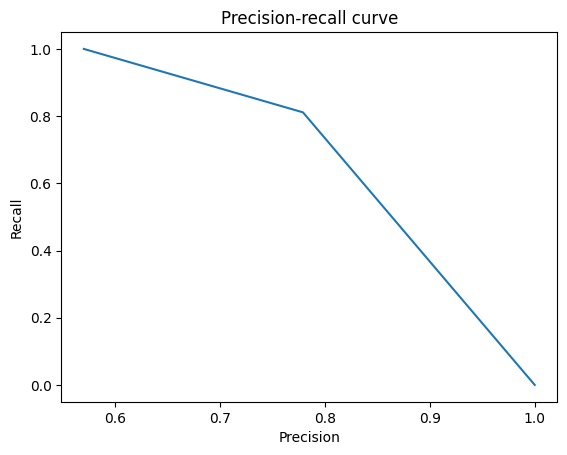

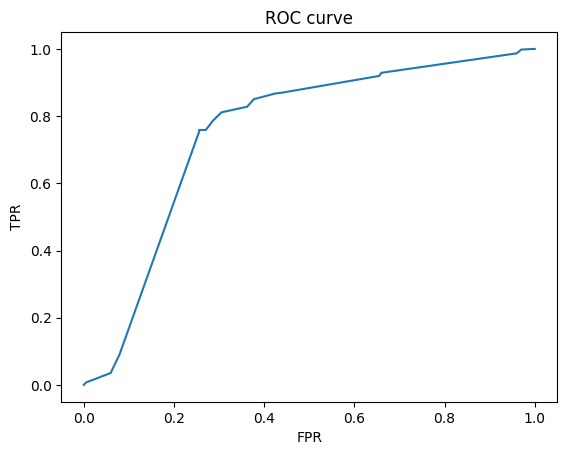

In [91]:
plot_curves(small_decision_tree)

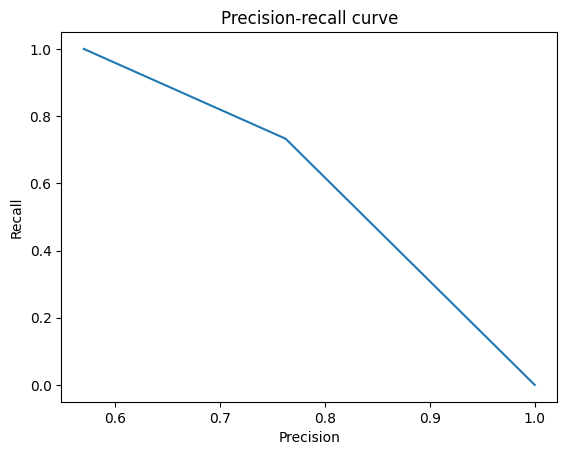

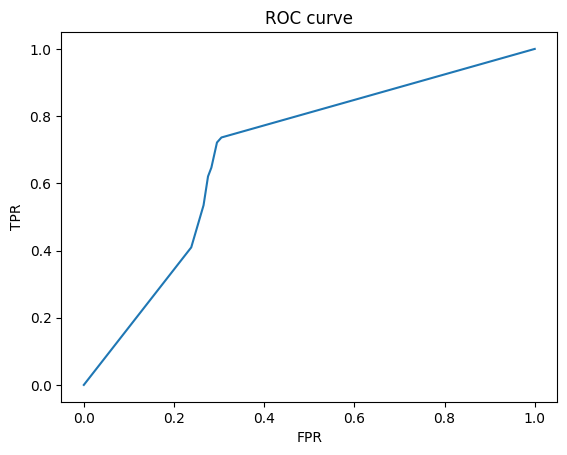

In [92]:
plot_curves(deep_decision_tree)

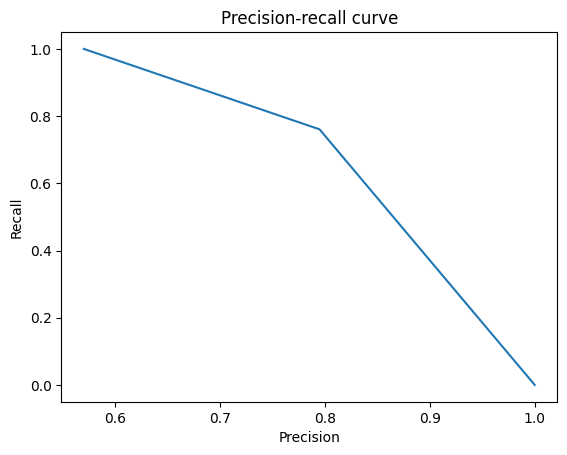

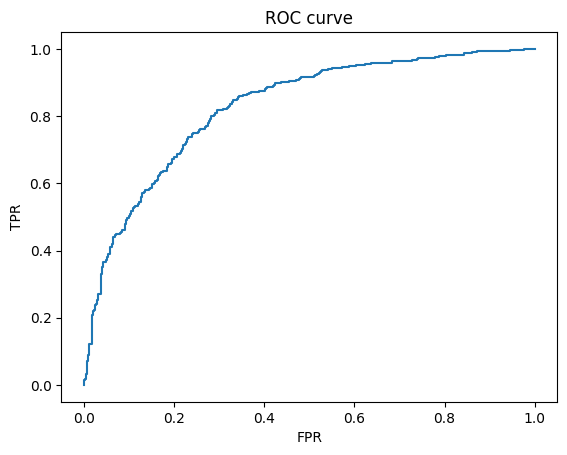

In [93]:
plot_curves(random_forest_on_small_trees)

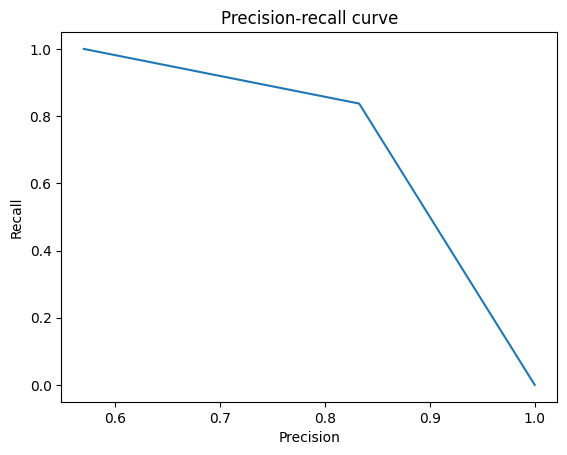

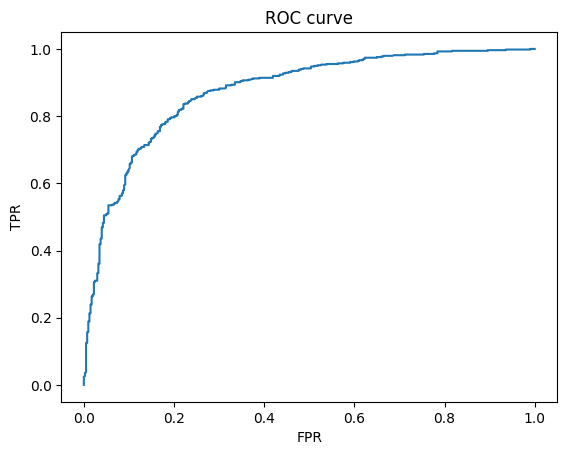

In [95]:
plot_curves(random_forest_on_deep_trees)

# Part 4

In [151]:
classifier_avoid_fn = RandomForestClassifier(n_estimators = 100, max_depth = 20, random_state = 42)
classifier_avoid_fn.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, random_state=42)

In [150]:
best_thrs = -1
for test_thrs in np.arange(0, 1.01, 0.01):
    y_pred_proba = classifier_avoid_fn.predict_proba(X_test)[:, 1]
    y_pred = (y_pred_proba > test_thrs) * 1
    recall_score = metrics.recall_score(y_test, y_pred)
    if recall_score >= 0.95:
        best_thrs = test_thrs

print(best_thrs)

0.31


In [152]:
thrs = 0.31

In [153]:
y_pred_proba = classifier_avoid_fn.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba > thrs) * 1

In [154]:
precision_score = metrics.precision_score(y_test, y_pred)
recall_score = metrics.recall_score(y_test, y_pred)
accuracy_score = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
log_loss = metrics.log_loss(y_test, y_pred_proba)

print(f"Precision: {precision_score}")
print(f"Recall: {recall_score}")
print(f"Accuracy: {accuracy_score}")
print(f"F1-score: {f1_score}")
print(f"Log-loss: {log_loss}")

Precision: 0.7019230769230769
Recall: 0.9551401869158879
Accuracy: 0.7430703624733476
F1-score: 0.8091844813935074
Log-loss: 0.4583080296672012
